# Lecture 13 Visualization with Matplotlib

Learning Objectives: 
* Create visualizations using both `Axes` and `pyplot` interface.
* Handle subplots effectively
* Read documentation to adjust visualizations.

Visualization modules in Python: 
* Matplotlib
* Seaborn
* Plotly

In [1]:
import pandas as pd
import matplotlib
from matplotlib.patches import Rectangle, Circle
import matplotlib.pyplot as plt
# pyplot is a high-level sub-module of matplotlib

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## [Plot Types](https://matplotlib.org/devdocs/plot_types/index.html)
* Pairwise data
    * Barplot (comparison)
    * Scatter plot (relationship)
    * Line plot (trend)
* Statistical distributions
    * Histogram
    * Boxplot

### Barplot: Num of games by genre

In [5]:
genre_count = df['Genre'].value_counts()
genre_count

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

matplotlib.axes._axes.Axes

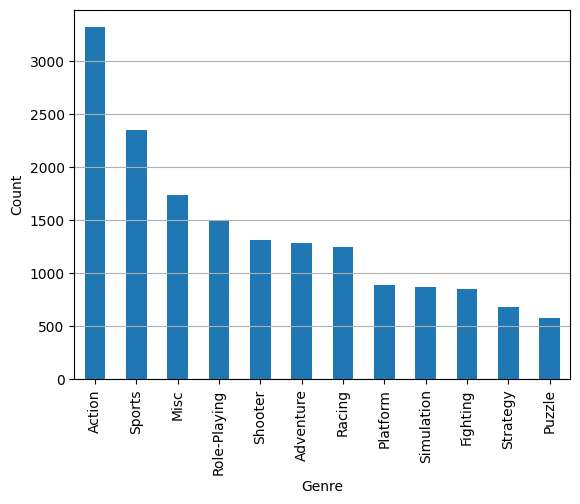

In [6]:
# Pandas syntax
ax = genre_count.plot.bar(ylabel='Count') # returns an Axes object that represents the plot within a figure
ax.grid(axis='y')
type(ax)

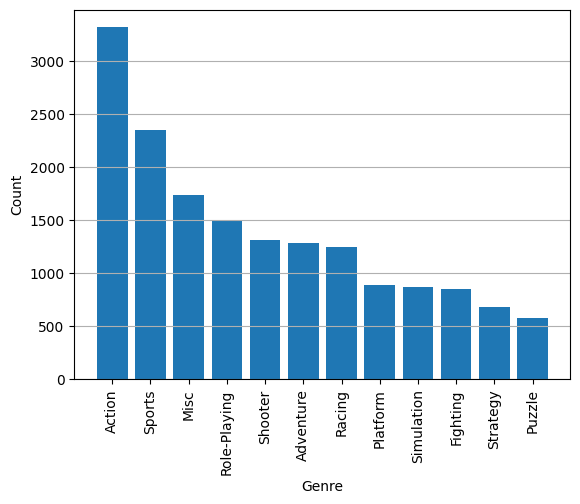

In [7]:
# pyplot interface (function-based, implicit)
plt.bar(genre_count.index, genre_count)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')

### Barplot: global sales by genre

In [8]:
global_sales_by_genre = df[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False)
global_sales_by_genre

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


<Axes: xlabel='Genre', ylabel='Global Sales (million)'>

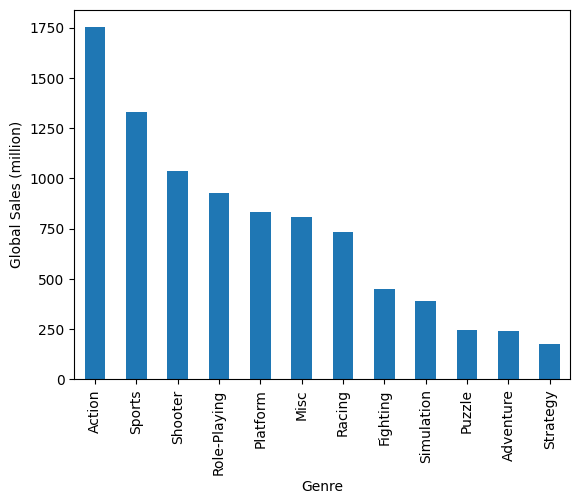

In [9]:
global_sales_by_genre.plot.bar(ylabel='Global Sales (million)', legend=False)

### Subplots: barplot of sales by genre for each region

(2, 2)

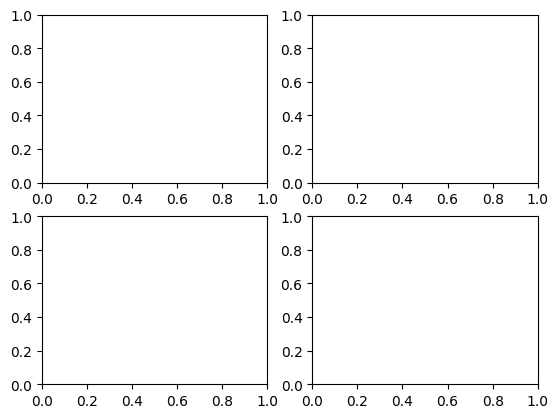

In [10]:
# Axes interface (object-based, explicit)
# returns a Figure and one or more Axes objects
fig, axes = plt.subplots(2, 2)
axes.shape

In [11]:
regions = ['NA', 'EU', 'JP', 'Other']
region_cols = [i + '_Sales' for i in regions]
print(region_cols)
df_by_genre = df[region_cols + ['Genre']].groupby('Genre').sum()
df_by_genre

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


<BarContainer object of 12 artists>

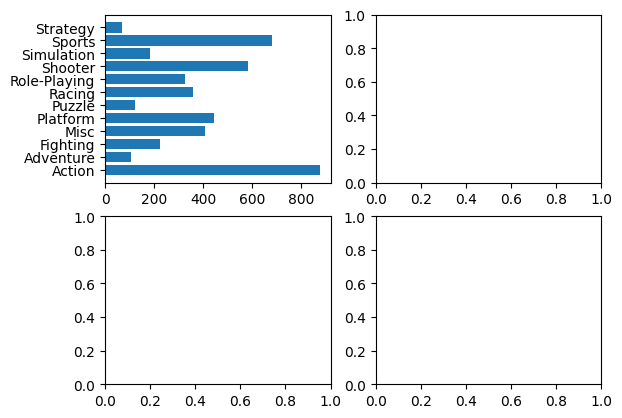

In [12]:
fig, axes = plt.subplots(2, 2)
axes[0][0].barh(df_by_genre.index, df_by_genre['NA_Sales'])

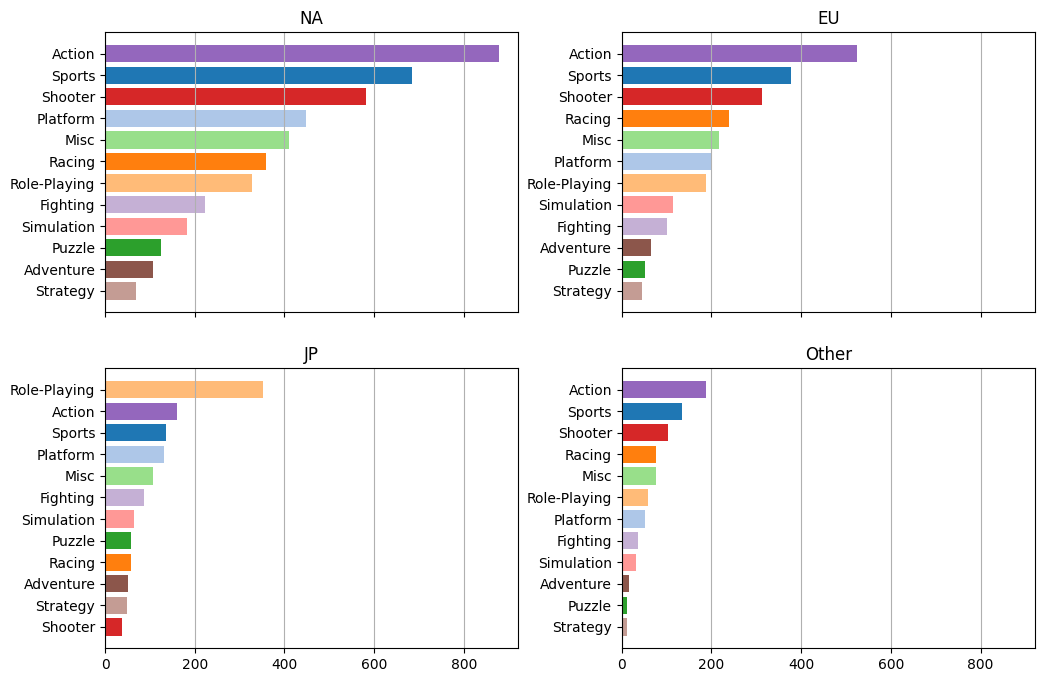

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()

genres = df['Genre'].unique()
cmap = matplotlib.colormaps.get_cmap('tab20')
colors = {genres[i]: cmap(i) for i in range(len(genres))}

for i in range(len(regions)): 
    region_sales = df_by_genre[region_cols[i]].sort_values()
    axes[i].barh(region_sales.index, region_sales, color=[colors[i] for i in region_sales.index])
    axes[i].set_title(regions[i])
    axes[i].grid(axis='x')
plt.subplots_adjust(wspace=0.25)

### Lineplot: global sales by year

In [14]:
global_sales_by_year = df[['Year', 'Global_Sales']].groupby('Year').sum()
global_sales_by_year

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


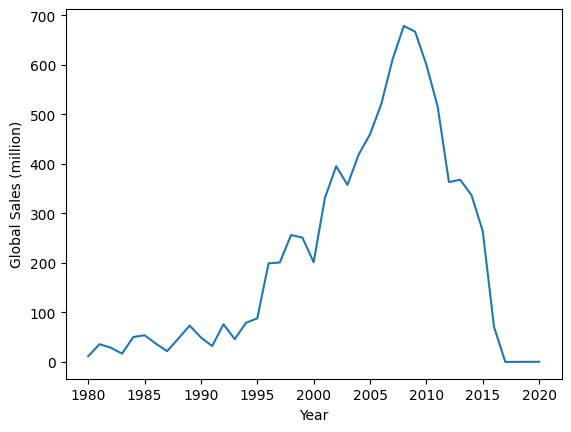

In [15]:
global_sales_by_year.plot(ylabel='Global Sales (million)', legend=False)
plt.show()

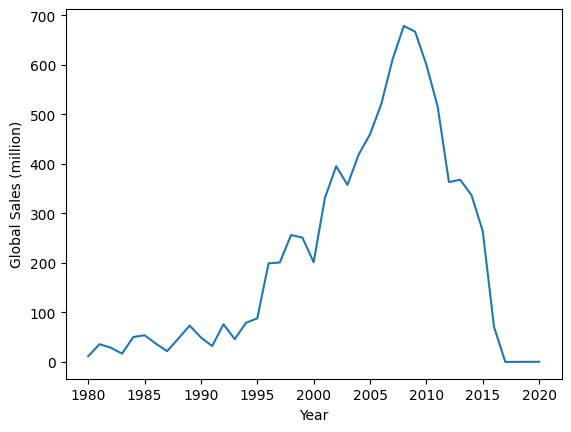

In [16]:
plt.plot(global_sales_by_year.index, global_sales_by_year['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Global Sales (million)')
plt.show()

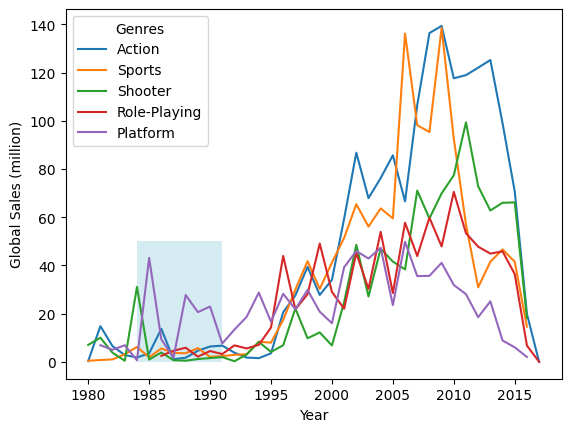

In [17]:
genres = df['Genre'].unique()

ax = plt.subplot()
for g in global_sales_by_genre.index[:5]:
    subset = df[df['Genre'] == g]
    subset_by_year = subset[['Year', 'Global_Sales']].groupby('Year').sum()
    ax.plot(subset_by_year.index, subset_by_year['Global_Sales'], label=g)

rect = Rectangle((1984, 0), 7, 50, edgecolor='none', facecolor='lightblue', alpha=0.5, zorder=-1)
ax.add_patch(rect)

plt.xlabel("Year")
plt.ylabel("Global Sales (million)")
plt.legend(title="Genres")
plt.show()

In [18]:
df.sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Histogram: global sales

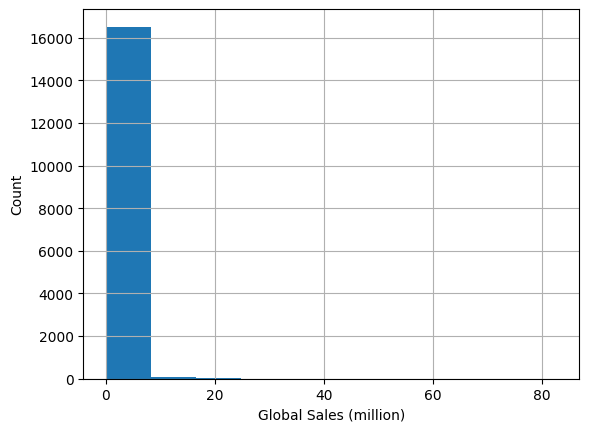

In [19]:
df['Global_Sales'].hist(bins=10)
plt.xlabel("Global Sales (million)")
plt.ylabel("Count")
plt.show()

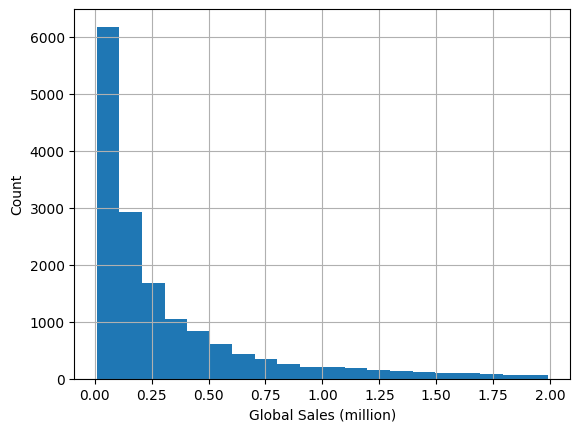

In [20]:
df[df['Global_Sales'] < 2]['Global_Sales'].hist(bins=20)
plt.xlabel("Global Sales (million)")
plt.ylabel("Count")
plt.show()

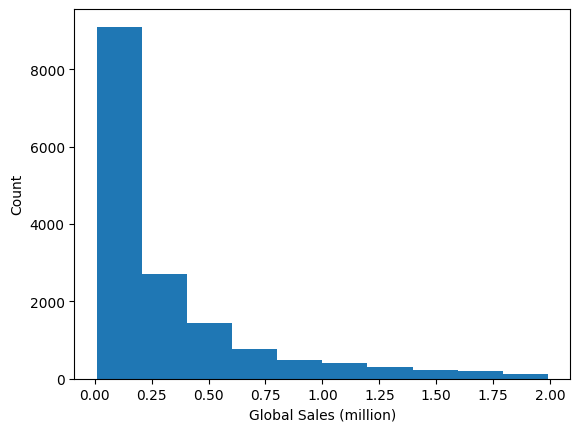

In [21]:
plt.hist(df[df['Global_Sales'] < 2]['Global_Sales'])
plt.xlabel("Global Sales (million)")
plt.ylabel("Count")
plt.show()

### Boxplot: sales by publisher

In [22]:
sales_by_publisher = df[['Global_Sales', 'Publisher']].groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)
sales_by_publisher

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Ongakukan,0.01
Commseed,0.01
Takuyo,0.01


In [23]:
top10_publisher_df = df[df['Publisher'].isin(sales_by_publisher[:10].index)]
top10_publisher_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16568,16571,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01


(0.0, 6.0)

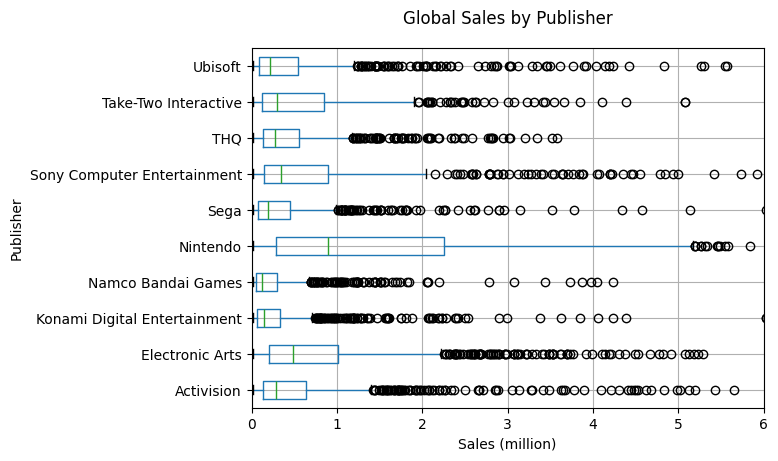

In [24]:
top10_publisher_df.boxplot('Global_Sales', 'Publisher', vert=False, xlabel='Sales (million)')
plt.title('')
plt.suptitle('Global Sales by Publisher')
plt.xlim(0, 6)

Text(0.5, 1.0, 'Global Sales by Publisher')

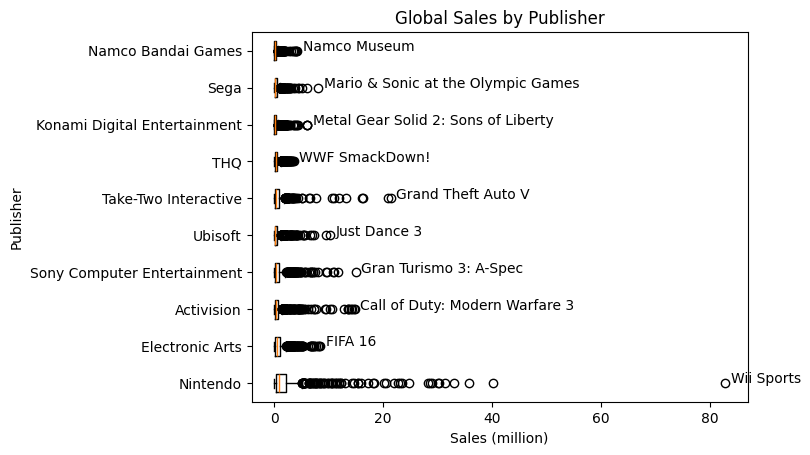

In [25]:
top10_publisher_names = sales_by_publisher.index[:10]
records_by_publisher = []
for publisher in top10_publisher_names:
    records_by_publisher.append(df[df['Publisher'] == publisher]['Global_Sales'])
plt.boxplot(records_by_publisher, tick_labels=top10_publisher_names, vert=False)

for i, publisher in enumerate(top10_publisher_names): 
    top1_game = df[df['Publisher'] == publisher][['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False)
    plt.annotate(top1_game.iat[0, 0], (top1_game.iat[0, 1] + 1, i + 1))
    
plt.xlabel('Sales (million)')
plt.ylabel('Publisher')
plt.title('Global Sales by Publisher')